## DL Lab 7
## Shresht Mishra
## 211020450

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv('D:/DL/Dataset/stock/stock_metadata.csv')

In [19]:
missing_values = data.isnull().sum() 
print("Missing values:\n", missing_values)

Missing values:
 Company Name    0
Industry        0
Symbol          0
Series          0
ISIN Code       0
dtype: int64


In [20]:
data = data.drop_duplicates()

In [21]:
X = data.drop('ISIN Code', axis=1)
y = data['ISIN Code']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [23]:
data = pd.DataFrame({'Category': ['A', 'B', 'A', 'C', 'B', 'C']})
label_encoder = LabelEncoder()
data['Category_encoded'] = label_encoder.fit_transform(data['Category'])
print(data)

  Category  Category_encoded
0        A                 0
1        B                 1
2        A                 0
3        C                 2
4        B                 1
5        C                 2


In [24]:
data = pd.DataFrame({'Category': ['A', 'B', 'A', 'C', 'B', 'C']}) 
data = pd.get_dummies(data, columns=['Category'], prefix=['Category'])
print(data)

   Category_A  Category_B  Category_C
0        True       False       False
1       False        True       False
2        True       False       False
3       False       False        True
4       False        True       False
5       False       False        True


In [25]:
X_train = np.array(...) 
y_train = np.array(...)

In [26]:
sequence_length = 52 
num_features = 4 
model = Sequential()
model.add(SimpleRNN(units=64, activation='tanh', input_shape=(sequence_length,num_features), return_sequences=True))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')
model = Sequential()

In [27]:
X_train = np.random.rand(100, 5)
y_train = np.random.rand(100)
learning_rate = 0.001
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
4/4 [==============================] - 0s 4ms/step - loss: 0.2832
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 0.1959
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 0.1401
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 0.1080
Epoch 5/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0927
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0900
Epoch 7/10
4/4 [==============================] - 0s 3ms/step - loss: 0.0908
Epoch 8/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0913
Epoch 9/10
4/4 [==============================] - 0s 3ms/step - loss: 0.0904
Epoch 10/10
4/4 [==============================] - 0s 3ms/step - loss: 0.0887


In [28]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
learning_rates = [0.1, 0.01, 0.001, 0.0001]
results = {}
for lr in learning_rates:
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
keras.layers.Dense(32, activation='relu'), keras.layers.Dense(1, activation='linear')
])
    optimizer = keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val,y_val), verbose=0)
mse = model.evaluate(X_val, y_val, verbose=0)
results[lr] = mse
for lr, mse in results.items():
    print(f'Learning Rate: {lr}, Validation Mean Squared Error: {mse:.4f}')

Learning Rate: 0.0001, Validation Mean Squared Error: 0.0705


In [29]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
activation_functions = ['relu', 'tanh', 'sigmoid', 'linear']
results = {}
for activation in activation_functions:
        keras.layers.Dense(64, activation=activation, input_shape=(X_train.shape[1],)),
        keras.layers.Dense(32, activation=activation),
        keras.layers.Dense(1, activation='linear')
        model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val,y_val), verbose=0)
mse = model.evaluate(X_val, y_val, verbose=0)
results[activation] = mse
for activation, mse in results.items():
    print(f'Activation Function: {activation}, Validation Mean Squared Error:{mse:.4f}')

Activation Function: linear, Validation Mean Squared Error:0.0631


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
evaluation_criteria = {
    'MSE': mean_squared_error,
    'MAE': mean_absolute_error,
    'R2': r2_score
}
results = {}
for metric_name, metric_func in evaluation_criteria.items():
    model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),verbose=0)
    y_pred = model.predict(X_val)
    score = metric_func(y_val, y_pred)
    results[metric_name] = score
for metric_name, score in results.items(): 
    print(f'{metric_name}: {score:.4f}')

1/1 [==============================] - 0s 31ms/step
MSE: 0.0865
MAE: 0.2529
R2: -0.2431


1/1 [==============================] - 0s 30ms/step


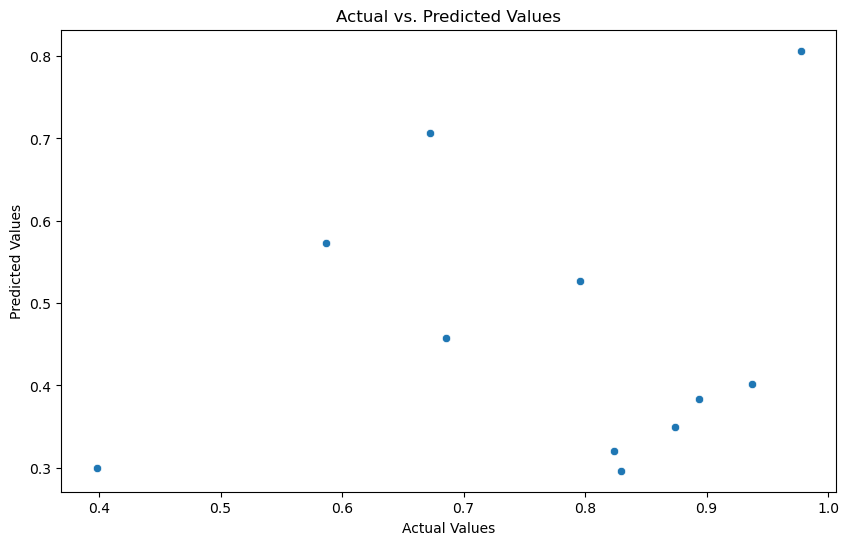

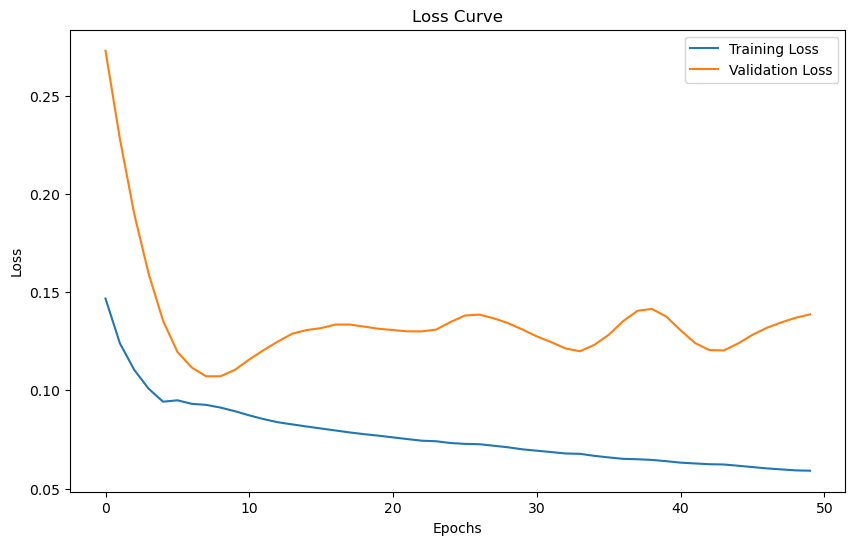

Mean Squared Error: 0.1386
R-squared (R2) Score: -4.1999


In [31]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val,y_val), verbose=0)
y_pred = model.predict(X_val)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val.reshape(-1), y=y_pred.reshape(-1))
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()
mse = mean_squared_error(y_val, y_pred) 
r2 = r2_score(y_val, y_pred) 
print(f'Mean Squared Error: {mse:.4f}') 
print(f'R-squared (R2) Score: {r2:.4f}')